### Fetch dataset from OpenML

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd

In [2]:
data = fetch_openml('pc1',version=1,parser='pandas')

### Load dataset into features and labels

In [3]:
X = data.data
y = data.target

### Data study

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(G)                0
N                    0
V                    0
L                    0
D                    0
I                    0
E                    0
B                    0
T                    0
lOCode               0
lOComment            0
locCodeAndComment    0
lOBlank              0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
dtype: int64

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                1109 non-null   float64
 1   v(g)               1109 non-null   float64
 2   ev(g)              1109 non-null   float64
 3   iv(G)              1109 non-null   float64
 4   N                  1109 non-null   float64
 5   V                  1109 non-null   float64
 6   L                  1109 non-null   float64
 7   D                  1109 non-null   float64
 8   I                  1109 non-null   float64
 9   E                  1109 non-null   float64
 10  B                  1109 non-null   float64
 11  T                  1109 non-null   float64
 12  lOCode             1109 non-null   int64  
 13  lOComment          1109 non-null   int64  
 14  locCodeAndComment  1109 non-null   int64  
 15  lOBlank            1109 non-null   int64  
 16  uniq_Op            1109 

In [7]:
X.describe()

,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,...,T,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1.109000e+03,...,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000
mean,23.376105,5.510730,2.766817,3.321371,117.393417,699.711217,0.129414,15.396267,32.904472,2.882288e+04,...,1601.273030,22.434626,4.696123,0.944995,6.745717,13.307665,20.892876,66.493417,50.901894,9.576555
std,35.284017,8.958976,5.567704,6.401998,197.336888,1509.545684,0.146952,16.337508,35.387685,1.706436e+05,...,9480.199989,33.574645,10.518447,3.345297,12.301210,8.182224,29.051434,111.703236,86.308689,16.540676
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,7.000000,1.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.710000,14.040000,5.581300e+02,...,31.010000,7.000000,0.000000,0.000000,1.000000,8.000000,6.000000,15.000000,10.000000,1.000000
50%,13.000000,3.000000,1.000000,2.000000,58.000000,275.100000,0.080000,11.610000,23.570000,3.189170e+03,...,177.180000,13.000000,0.000000,0.000000,2.000000,12.000000,12.000000,33.000000,24.000000,5.000000
75%,26.000000,6.000000,3.000000,3.000000,126.000000,674.040000,0.160000,20.500000,41.150000,1.238156e+04,...,687.860000,24.000000,5.000000,1.000000,8.000000,17.000000,25.000000,72.000000,56.000000,11.000000
max,602.000000,136.000000,123.000000,123.000000,2785.000000,25942.690000,2.000000,270.660000,598.330000,4.279633e+06,...,237757.400000,600.000000,159.000000,48.000000,225.000000,99.000000,538.000000,1641.000000,1144.000000,236.000000


(array(['false', 'true'], dtype=object), array([1032,   77], dtype=int64))


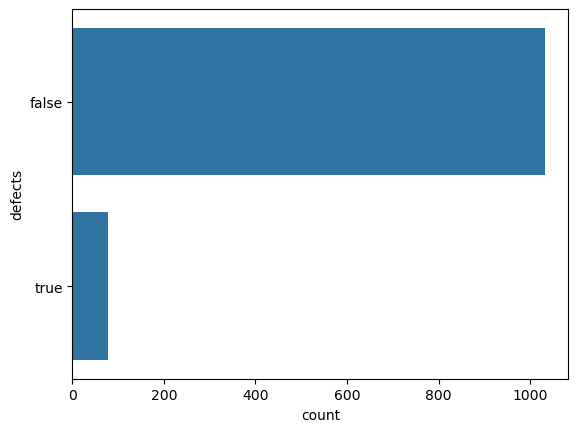

In [8]:
print(np.unique(y, return_counts=True))
plt.figure()
sns.countplot(y)
plt.show()

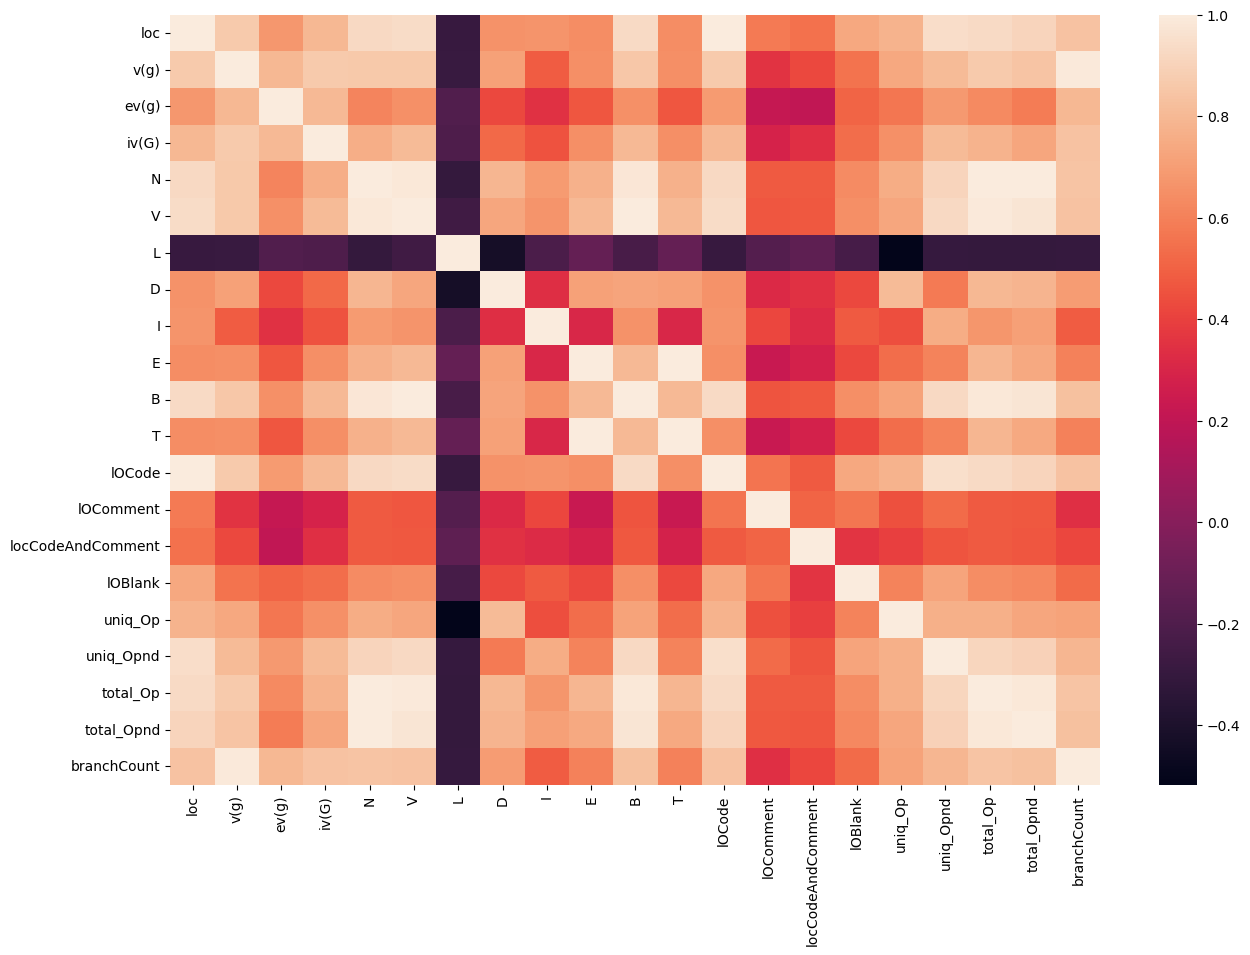

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr())
plt.show()

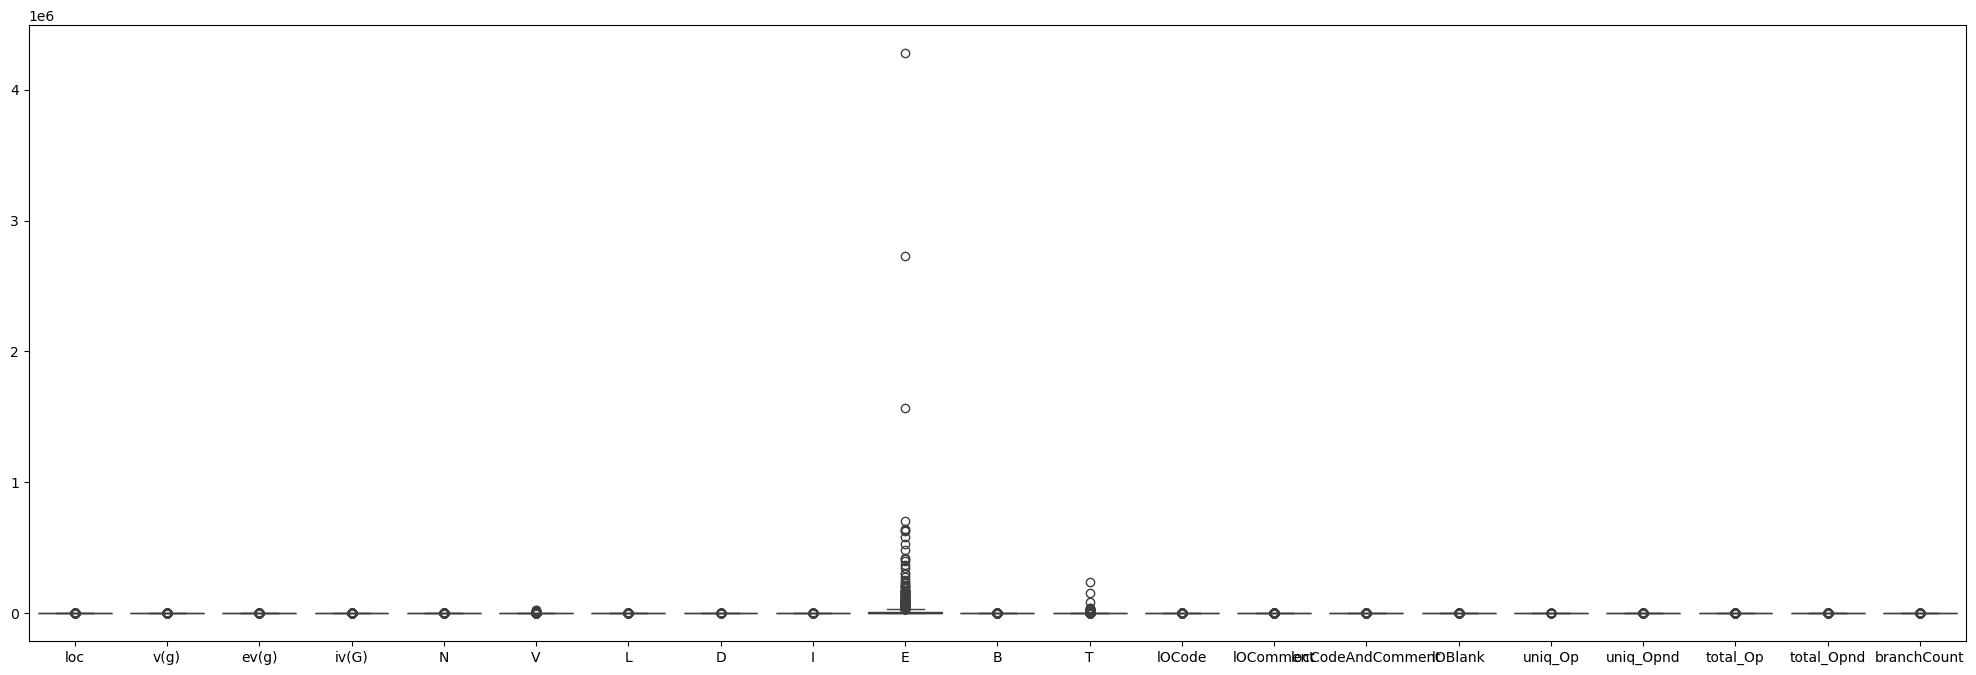

In [10]:
plt.figure(figsize=(25, 8))
sns.boxplot(X)
plt.show()

## Data preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [12]:
scaler = StandardScaler()
encoder = LabelEncoder()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((887, 21), (887,), (222, 21), (222,))

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

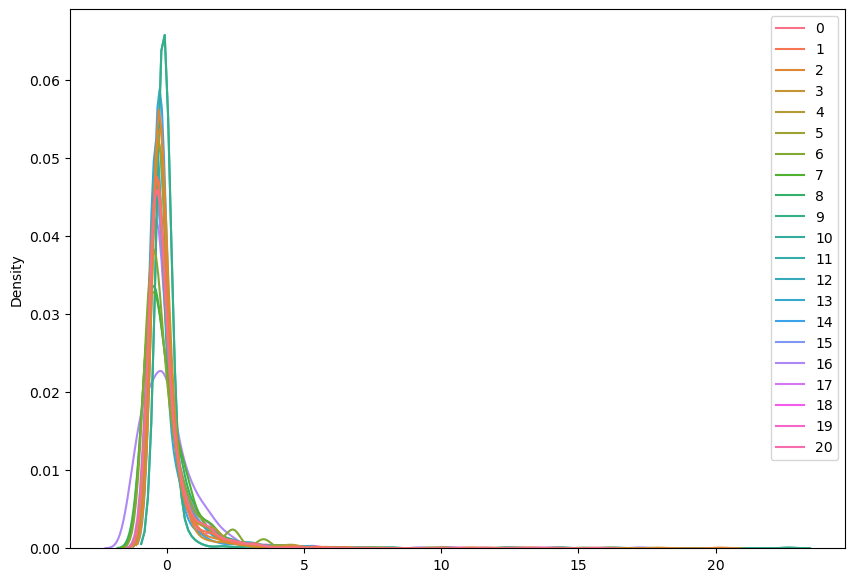

In [16]:
plt.figure(figsize=(10,7))
sns.kdeplot(X_train_scaled)
plt.show()

## Running some experiments

#### RandomForestModel

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [18]:
rf_model = RandomForestClassifier().fit(X_train_scaled, y_train)

#### Evaluating the RandomForest model

Accuracy:93.69%


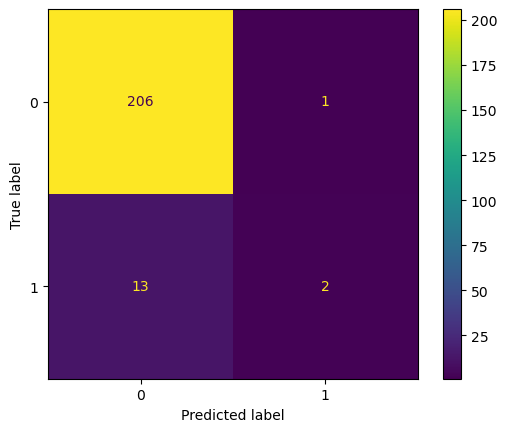

              precision    recall  f1-score   support

       false       0.94      1.00      0.97       207
        true       0.67      0.13      0.22        15

    accuracy                           0.94       222
   macro avg       0.80      0.56      0.59       222
weighted avg       0.92      0.94      0.92       222



In [19]:
labels=['false','true']
rf_preds = rf_model.predict(X_test_scaled)
print(f'Accuracy:{metrics.accuracy_score(y_test, rf_preds)*100:.2f}%')
cm = metrics.confusion_matrix(y_test, rf_preds,labels=labels)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print(metrics.classification_report(y_test, rf_preds))

#### SVM model

In [20]:
from sklearn.svm import SVC

In [21]:
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [22]:
svm_model = SVC().fit(X_train_scaled, y_train_encoded)

#### Evaluating the svm model

Accuracy:94.14%


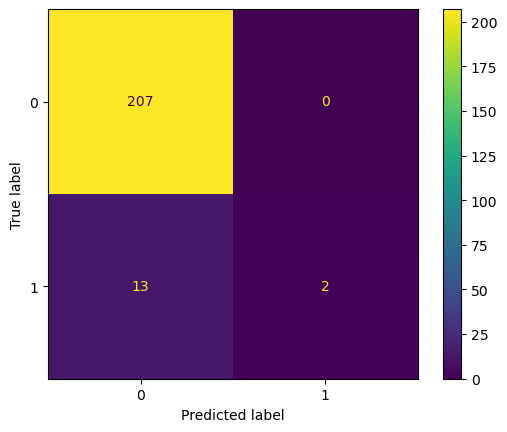

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       207
           1       1.00      0.13      0.24        15

    accuracy                           0.94       222
   macro avg       0.97      0.57      0.60       222
weighted avg       0.94      0.94      0.92       222



In [23]:
svm_preds = svm_model.predict(X_test_scaled)
print(f'Accuracy:{metrics.accuracy_score(y_test_encoded, svm_preds)*100:.2f}%')
cm = metrics.confusion_matrix(y_test_encoded, svm_preds)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print(metrics.classification_report(y_test_encoded, svm_preds))

#### Dense model

In [24]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.optimizers import Adam

In [25]:
model_checkpoint = callbacks.ModelCheckpoint(filepath='./ModelExperiments/dense_model.keras',
                                             save_best_only=True)
reduce_lr = callbacks.ReduceLROnPlateau(patience=3,
                                        min_lr=1e-7)

In [26]:
dense_model = Sequential([
    layers.Dense(18, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [27]:
dense_model.compile(loss='binary_crossentropy',
                   optimizer=Adam(),
                   metrics=['accuracy'])

In [ ]:
dense_model.fit(X_train_scaled,y_train_encoded,
                epochs=100,
                callbacks=[model_checkpoint, reduce_lr])

In [29]:
dense_model.evaluate(X_test_scaled, y_test_encoded)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9226 - loss: 0.2296  


[0.20024141669273376, 0.9369369149208069]

#### Evaluating the model

In [30]:
dense_prob_preds = dense_model.predict(X_test_scaled)
dense_preds = tf.squeeze(tf.round(dense_prob_preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Accuracy:93.69%


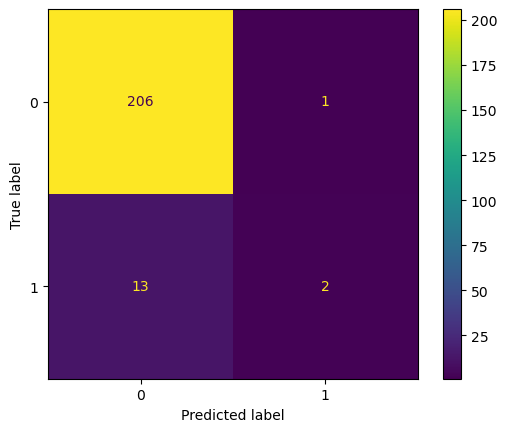

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       207
           1       0.67      0.13      0.22        15

    accuracy                           0.94       222
   macro avg       0.80      0.56      0.59       222
weighted avg       0.92      0.94      0.92       222



In [31]:
print(f'Accuracy:{metrics.accuracy_score(y_test_encoded, dense_preds)*100:.2f}%')
cm = metrics.confusion_matrix(y_test_encoded, dense_preds)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print(metrics.classification_report(y_test_encoded, dense_preds))